In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cascadecup/savecat.pkl
/kaggle/input/cascadecup/savehistgbt.pkl
/kaggle/input/cascadecup/savegbt.pkl
/kaggle/input/cascadecup/savelgb.pkl
/kaggle/input/cascadecup/savedtr.pkl
/kaggle/input/cascadecup/savexgb.pkl
/kaggle/input/cascadecup/test_age_dataset.csv
/kaggle/input/cascadecup/train_age_dataset.csv
/kaggle/input/cascadecup/Modified.csv
/kaggle/input/absenteeism-at-work-uci-ml-repositiory/Absenteeism_at_work.csv


In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
pd.options.display.max_columns = 50
df = pd.read_csv('/kaggle/input/absenteeism-at-work-uci-ml-repositiory/Absenteeism_at_work.csv', sep=";")
display(df.head())
df.shape

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


(740, 21)

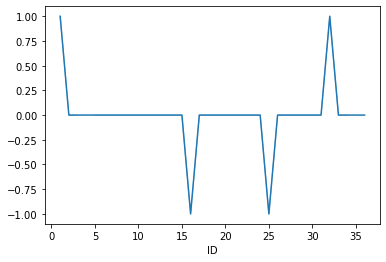

In [85]:
import math
sns.lineplot(df['ID'], round((df['Weight']/(df['Height']/100)**2)) - df['Body mass index'])

In [70]:
df['Body mass index']

0      30
1      31
2      31
3      24
4      30
       ..
735    30
736    29
737    34
738    35
739    25
Name: Body mass index, Length: 740, dtype: int64

In [66]:
z = df.groupby(['ID'], as_index=False).max() - df.groupby(['ID'], as_index=False).min()
z['ID'] = df.groupby(['ID']).sum().index
fig = px.bar(z, 
             x="ID", y="Age", 
             title='Change in age for the given ids', 
             text='Age', 
             orientation='v', 
             width=1000, height=700)
fig.update_traces(marker_color='#008000', opacity=0.8, textposition='outside')

# fig.update_layout(template = 'plotly_dark')
fig.show()

In [27]:
# df2 = df[(df['Absenteeism time in hours']>0) & (df[df['Absenteeism time in hours']<120])]
df2 = df[df['Absenteeism time in hours']>0]
df2 = df2[df2['Absenteeism time in hours']<120]
df3 = df[df['Absenteeism time in hours']==0]

In [30]:
fig = px.treemap(df2, 
                 path=['Seasons', 'Month of absence', 'Day of the week'], 
                 values='Absenteeism time in hours',
                 color='Absenteeism time in hours', 
                 hover_data=['Seasons'],
#                  color_continuous_scale='dense', 
                 title='Absentism in hours per season per month per day of week'
                )
fig.show()

In [46]:
y = df['Absenteeism time in hours']
df['y'] = y

In [47]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=3)
feat_cols = df.columns[:-3]
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

In [48]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Edu_Text,y,pca-one,pca-two,pca-three
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4,High school,4,67.396775,-32.816572,7.954181
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0,High school,0,-105.788563,-30.422312,-13.539814
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2,High school,2,-41.033862,-33.375619,29.389275
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4,High school,4,56.847784,-31.070156,-22.681753
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2,High school,2,67.442612,-32.730460,7.629828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8,High school,8,67.687830,-7.440380,7.943526
736,1,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4,Postgraduate,4,12.790841,-6.739193,-4.706875
737,4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0,High school,0,-103.906869,0.182810,4.977325
738,8,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0,High school,0,9.598468,-0.596615,14.540579


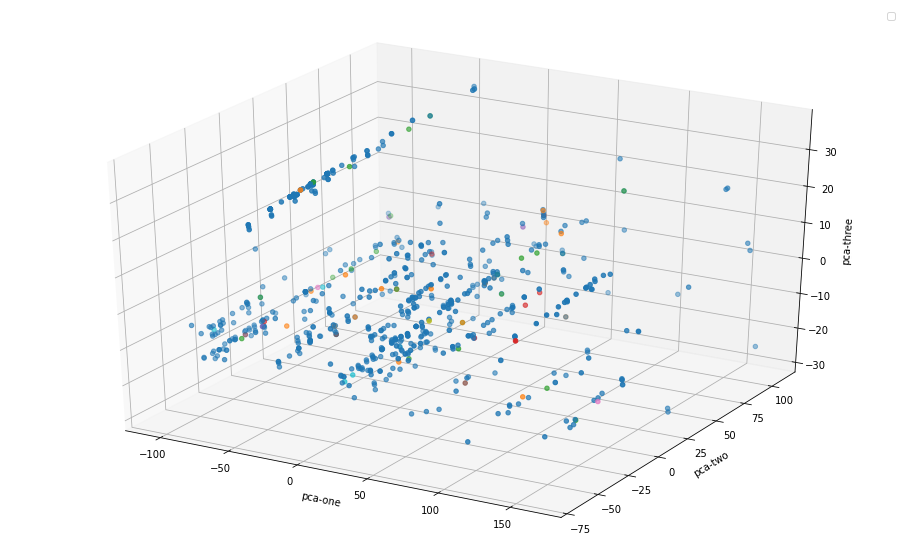

In [53]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10',
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
ax.legend()
plt.show()

In [55]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df[feat_cols])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 740 samples in 0.005s...
[t-SNE] Computed neighbors for 740 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 740 / 740
[t-SNE] Mean sigma: 15.465913
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.248989
[t-SNE] KL divergence after 300 iterations: 0.305649


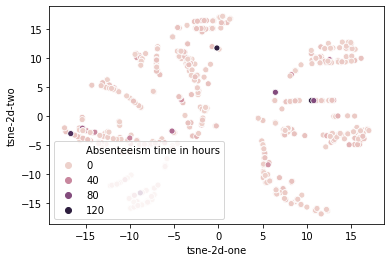

In [67]:
sns.scatterplot(df["tsne-2d-one"], df["tsne-2d-two"], data=df, hue='Absenteeism time in hours')

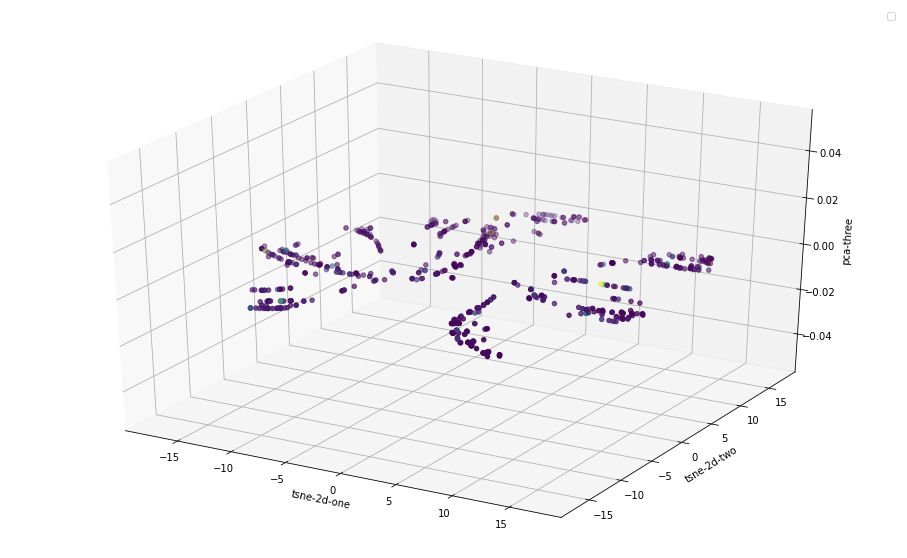

In [61]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["tsne-2d-one"], 
    ys=df.loc[rndperm,:]["tsne-2d-two"], 
#     zs=df.loc[rndperm,:]["pca-three"],
    c=df.loc[rndperm,:]["y"], 
#     cmap='tab10',
)
ax.set_xlabel('tsne-2d-one')
ax.set_ylabel('tsne-2d-two')
ax.set_zlabel('pca-three')
ax.legend()
plt.show()

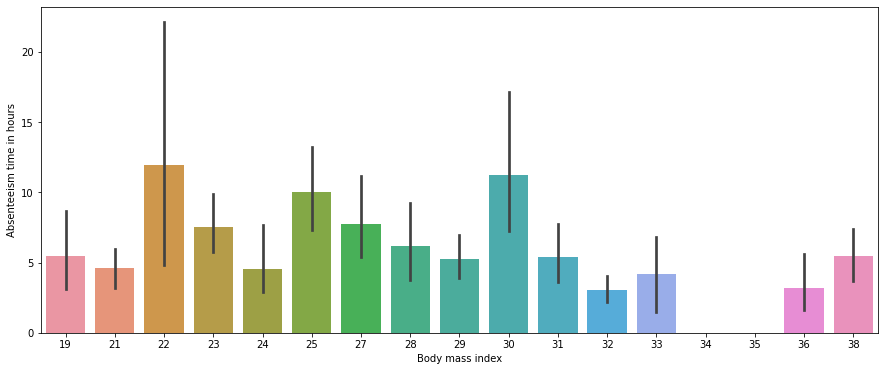

In [13]:
plt.figure(figsize = (15, 6))
sns.barplot(df['Body mass index'], df['Absenteeism time in hours'])

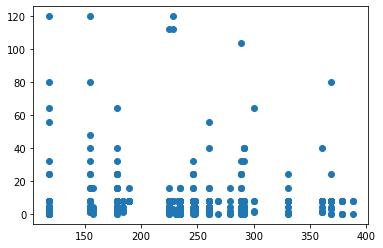

In [36]:
plt.scatter(df['Transportation expense'],  df['Absenteeism time in hours'])

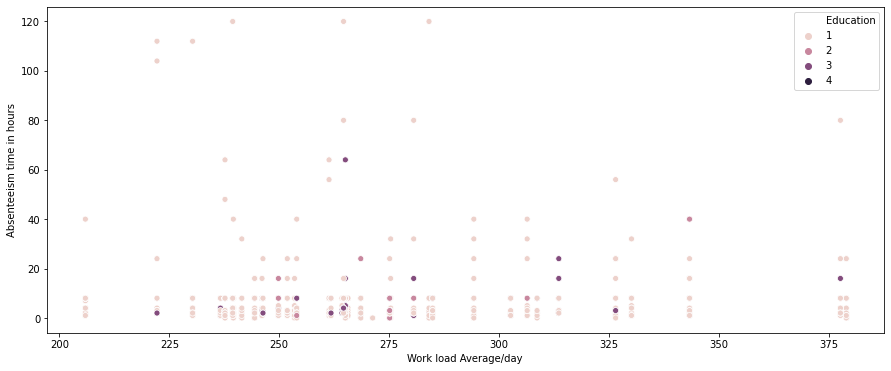

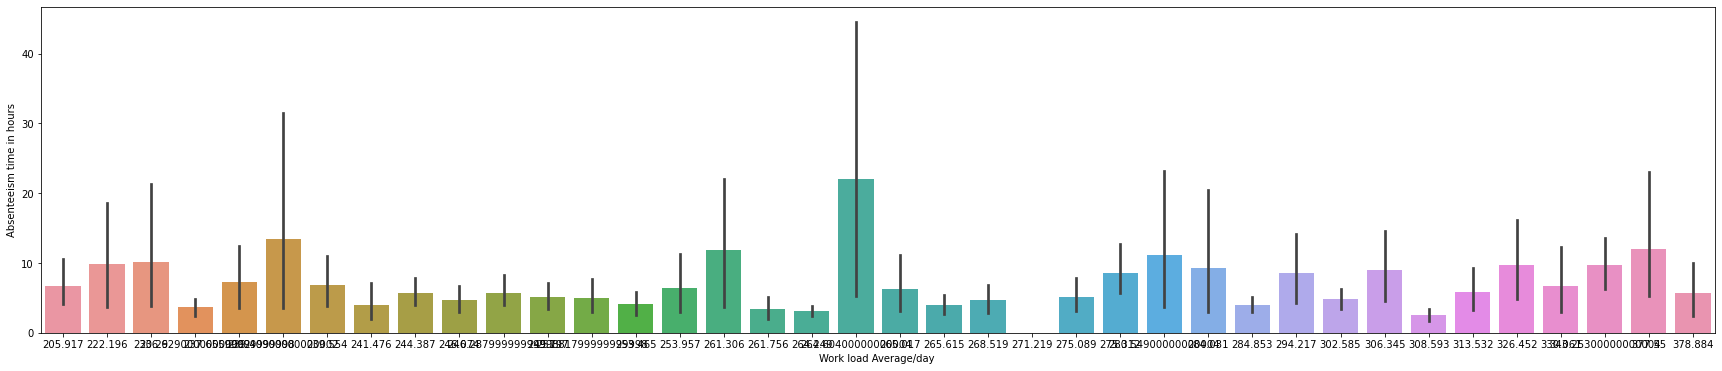

In [39]:
plt.figure(figsize = (15, 6))
sns.scatterplot(df['Work load Average/day '], df['Absenteeism time in hours'], hue=df['Education'])
plt.legend()
plt.show()
plt.figure(figsize = (30, 6))
sns.barplot(df['Work load Average/day '], df['Absenteeism time in hours'])
plt.show()

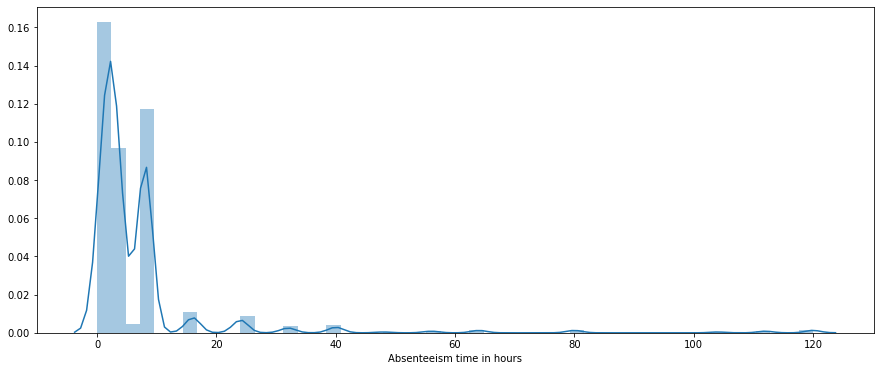

In [6]:
plt.figure(figsize = (15, 6))
sns.distplot(df['Absenteeism time in hours'])

<Figure size 1080x432 with 0 Axes>

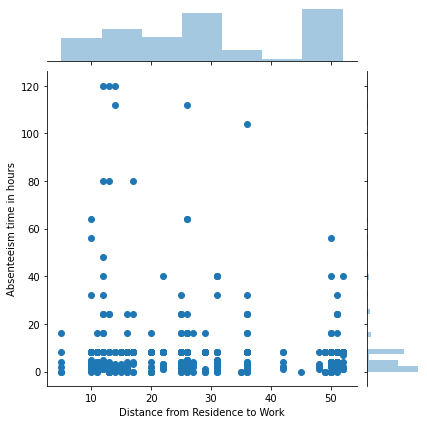

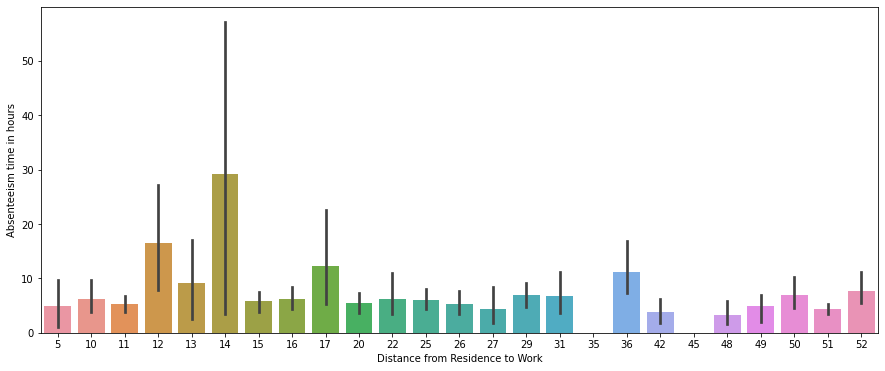

In [37]:
plt.figure(figsize = (15, 6))
sns.jointplot(df['Distance from Residence to Work'], df['Absenteeism time in hours'])
plt.show()
plt.figure(figsize = (15, 6))
sns.barplot(df['Distance from Residence to Work'], df['Absenteeism time in hours'])
plt.show()

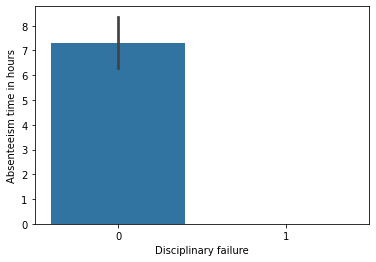

In [38]:
sns.barplot(df['Disciplinary failure'],df['Absenteeism time in hours'])

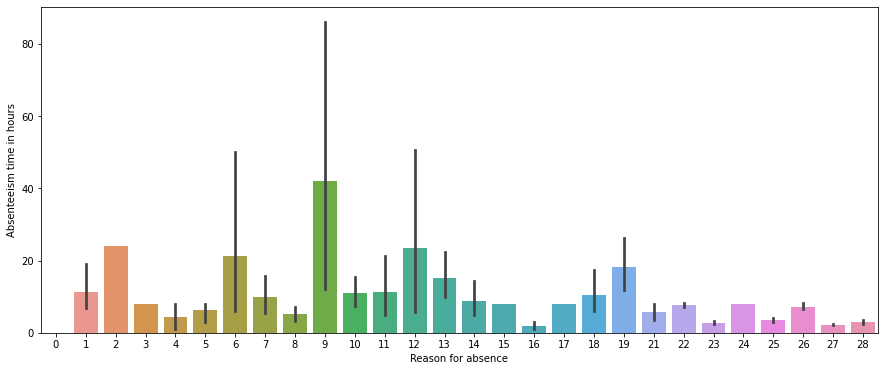

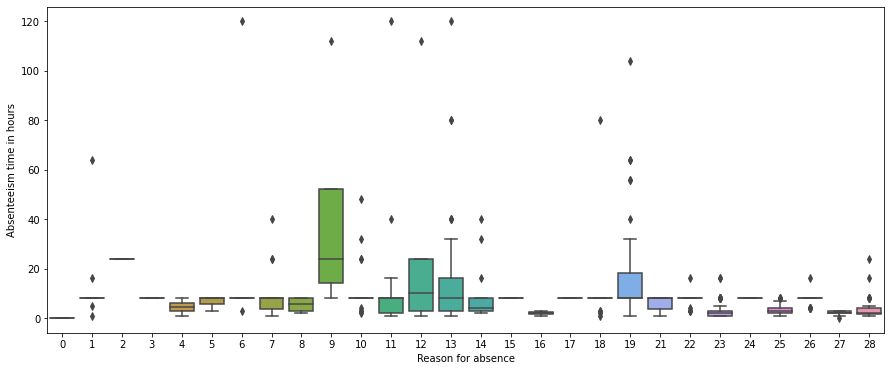

In [39]:
plt.figure(figsize = (15, 6))
sns.barplot(df['Reason for absence'], df['Absenteeism time in hours'])
plt.show()
plt.figure(figsize = (15, 6))
sns.boxplot(df['Reason for absence'], df['Absenteeism time in hours'])
plt.show()

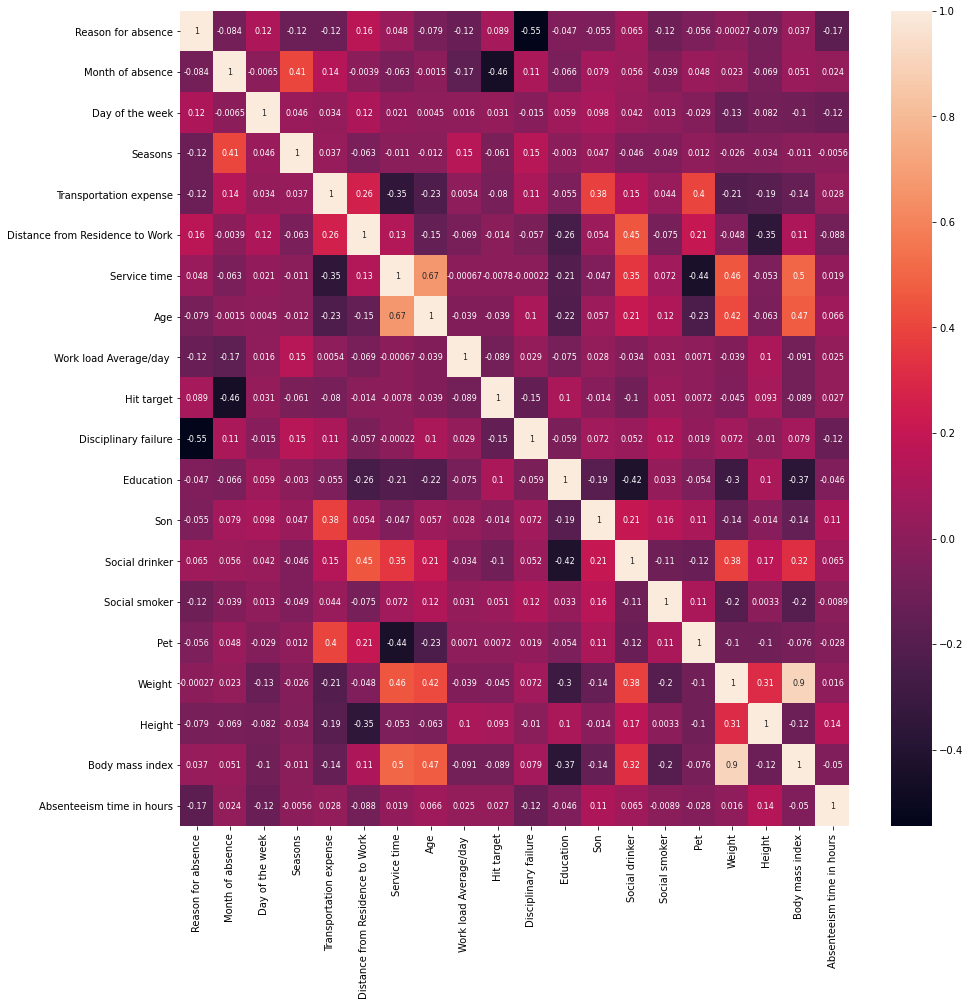

In [40]:
f,ax = plt.subplots(figsize = (15,15))
sns.heatmap(df.drop(['ID'],axis=1).corr(),annot=True,annot_kws={'size':8})

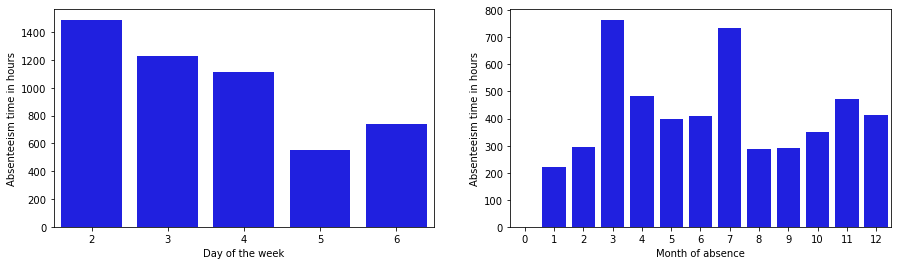

In [41]:
plt.figure(figsize = (15,4))
plt.subplot(1, 2, 1)
sns.barplot(df.groupby(['Day of the week'])['Absenteeism time in hours'].sum().index, 
            df.groupby(['Day of the week'])['Absenteeism time in hours'].sum(), color='b')
plt.subplot(1, 2, 2)
sns.barplot(df.groupby(['Month of absence'])['Absenteeism time in hours'].sum().index, 
            df.groupby(['Month of absence'])['Absenteeism time in hours'].sum(), color='b')
plt.show()

In [ ]:
df.groupby(['Month of absence', 'Day of the week'])['Absenteeism time in hours'].sum()

In [ ]:
# f,ax = plt.subplots(figsize = (5,5))
# sns.distplot(df.loc[df['Absenteeism time in hours']>20], kde=True)

In [ ]:
sns.jointplot(df['Service time'], df['Body mass index'], kind='reg')

In [ ]:
df['Reason for absence'].value_counts()

In [ ]:
df.groupby(['Seasons', 'Month of absence', 'Day of the week', 'Reason for absence'], as_index=False)[['ID']].count()

In [ ]:
df.groupby(['Seasons', 'Absenteeism time in hours','ID'],as_index=False).count()

In [ ]:
sns.jointplot(df['Age'], df['Absenteeism time in hours'])
df

In [ ]:
for m in df['Month of absence'].unique():
    print(m)
    display(df[df['Month of absence']==m])

In [ ]:
sns.jointplot(df.groupby(['Work load Average/day '])['Absenteeism time in hours'].sum().index,
              df.groupby(['Work load Average/day '])['Absenteeism time in hours'].sum(), kind='reg')

In [ ]:
z = df.groupby(['ID'])['Absenteeism time in hours'].sum()
f,ax = plt.subplots(figsize = (15,15))
plt.bar(z.index, z)

In [ ]:
df.columns